# Exploration of Zipfness in Modern Tokenizers
Members: Jack Hanke, Daniel Plotkin, Nicole Birova

In [7]:
# get RoBERTa, GPT-4 tokenizers
from transformers import RobertaTokenizer, AutoTokenizer
import tiktoken

class RoBERTa_Tokenizer:
    def __init__(self):
        self.name = 'RoBERTa Tokenizer'
        self.tokenizer = RobertaTokenizer.from_pretrained("FacebookAI/roberta-base")
    def tokenize(self, text_str: str):
        return self.tokenizer.encode(text_str[:512])
    def detokenize(self, tokens: list[int]):
        return self.tokenizer.decode(tokens)

class GPT4_Tokenizer:
    def __init__(self):
        self.name = 'GPT 4 Tokenizer'
        self.tokenizer = tiktoken.encoding_for_model("gpt-4o")
    def tokenize(self, text_str: str):
        return self.tokenizer.encode(text_str)
    def detokenize(self, tokens: list[int]):
        return self.tokenizer.decode(tokens)

roberta_tokenizer = RoBERTa_Tokenizer()
gpt_tokenizer = GPT4_Tokenizer()

text_str = "Hello world"
assert roberta_tokenizer.detokenize(roberta_tokenizer.tokenize(text_str=text_str))
assert gpt_tokenizer.detokenize(gpt_tokenizer.tokenize(text_str=text_str))


In [8]:
# 
def increment_dict(dictionary: dict, key: str):
    try:
        dictionary[key] += 1
    except KeyError:
        dictionary[key] = 1

# 
def sort_dictionary(dictionary: dict):
    return {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1], reverse=True)}

# 
# increment frequency for a given item (sentence) and a given tokenizer
def increment_frequency(dictionary:dict, item: str, tokenizer):
    # if no tokenizer, increment word freq
    if tokenizer is None:
        for count, word in enumerate(item.split()):
            increment_dict(dictionary=dictionary, key=word)
        return count+1
    
    # increment token freq
    tokens = tokenizer.tokenize(item)
    for count, token in enumerate(tokens):
        increment_dict(dictionary=dictionary, key=token)
        return count+1

# 
def normalize_dictionary(dictionary: dict, denominator: int):
    return_dictionary = {}
    for key, value in dictionary.items():
        return_dictionary[key] = value/denominator
    
    return return_dictionary


In [9]:
# get bookscorpus from: "https://storage.googleapis.com/huggingface-nlp/datasets/bookcorpus/bookcorpus.tar.bz2"
from tqdm import tqdm

word_freq_dict, gpt_token_freq_dict, roberta_token_freq_dict = {}, {}, {}
word_count, gpt_token_count, roberta_token_count = 0, 0, 0

# NOTE this is over 2GB each
with open(f'data/books_large_p1.txt', 'r') as f:
    prog_bar = tqdm(f.readlines())
    for line in prog_bar:
        item = str(line)
        word_count += increment_frequency(dictionary=word_freq_dict, item=item, tokenizer=None)
        gpt_token_count += increment_frequency(dictionary=gpt_token_freq_dict, item=item, tokenizer=gpt_tokenizer)
        roberta_token_count += increment_frequency(dictionary=roberta_token_freq_dict, item=item, tokenizer=roberta_tokenizer)

with open(f'data/books_large_p2.txt', 'r') as f:
    prog_bar = tqdm(f.readlines())
    for line in prog_bar:
        item = str(line)
        word_count += increment_frequency(dictionary=word_freq_dict, item=item, tokenizer=None)
        gpt_token_count += increment_frequency(dictionary=gpt_token_freq_dict, item=item, tokenizer=gpt_tokenizer)
        roberta_token_count += increment_frequency(dictionary=roberta_token_freq_dict, item=item, tokenizer=roberta_tokenizer)

# 
sorted_word_freq_dict = sort_dictionary(dictionary=word_freq_dict)
word_frequencies = normalize_dictionary(dictionary=sorted_word_freq_dict, denominator=word_count)

sorted_gpt_token_freq_dict = sort_dictionary(dictionary=gpt_token_freq_dict)
gpt_token_frequencies = normalize_dictionary(dictionary=sorted_gpt_token_freq_dict, denominator=gpt_token_count)

sorted_roberta_token_freq_dict = sort_dictionary(dictionary=roberta_token_freq_dict)
roberta_token_frequencies = normalize_dictionary(dictionary=sorted_roberta_token_freq_dict, denominator=roberta_token_count)


100%|██████████| 34004228/34004228 [47:51<00:00, 11840.56it/s] 


In [13]:
import pickle
# save distributions
with open('bookscorpus_words.pickle', 'wb') as f:
    pickle.dump(word_frequencies, f) 
with open('bookscorpus_gpt4.pickle', 'wb') as f:
    pickle.dump(gpt_token_frequencies, f) 
with open('bookscorpus_roberta.pickle', 'wb') as f:
    pickle.dump(roberta_token_frequencies, f) 

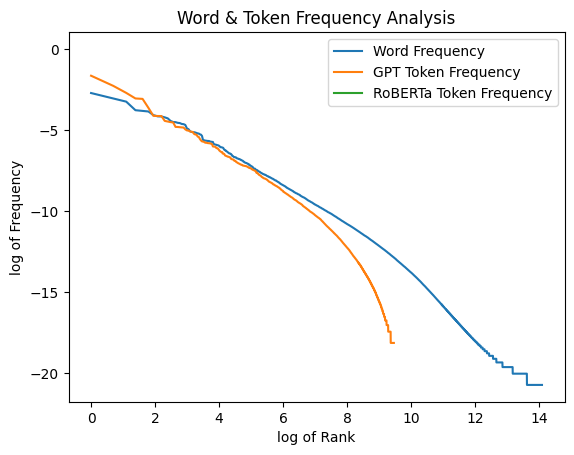

In [12]:
# 
import matplotlib.pyplot as plt
from math import log

plt.plot([log(key_num+1) for key_num, key in enumerate(word_frequencies)], [log(float(value)) for key, value in word_frequencies.items()], label='Word Frequency')
plt.plot([log(key_num+1) for key_num, key in enumerate(gpt_token_frequencies)], [log(float(value)) for key, value in gpt_token_frequencies.items()], label='GPT Token Frequency')
plt.plot([log(key_num+1) for key_num, key in enumerate(roberta_token_frequencies)], [log(float(value)) for key, value in roberta_token_frequencies.items()], label='RoBERTa Token Frequency')
plt.title(f'Word & Token Frequency Analysis')
plt.xlabel(f'log of Rank')
plt.ylabel(f'log of Frequency')
plt.legend()
plt.show()

In [ ]:
import scipy.stats as stats

# test the zipfness of a corpus, tokenizer pair
def test_zipfness(freq_dict: dict):
    # TODO fit distribution

    # TODO kolmogorov-smirnov test each distribution
    distributions = [

    ]

    result = stats.ktest()

    return result


In [ ]:
# TODO results on cleaned C4